# Project 3 - COVID-19

__Fehmi Can Özer__  
__2407583__

<span style="color:blue; font-size:1.3em">Part a.</span>

Data set on the geographic distribution of COVID-19 cases worldwide
obtained from EU Open Data Portal
 
**Data Source :** [EU OPEN DATA PORTAL](https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863)

-----

Descriptive Statistics and visualization of COVID-19 dataset:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
cov = pd.read_csv('cov.csv')
cov.head()

,Unnamed: 0,Date,day,month,year,cases,deaths,CountryName,CountryCode,countryterritoryCode,popData2018,continentExp
0,0,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
1,1,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
2,2,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
3,3,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
4,4,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia


In [5]:
cov.Date=pd.to_datetime(cov.Date,format='%Y-%m-%d')  # "Date" column is an object we convert it to Date format

## General describtive statistics

In [6]:
cov[['cases','deaths','popData2018']].describe()

,cases,deaths,popData2018
count,13623.000000,13623.000000,1.349700e+04
mean,218.945019,15.429274,5.599081e+07
std,1554.359440,119.405913,1.852815e+08
min,-1430.000000,0.000000,1.000000e+03
25%,0.000000,0.000000,2.789533e+06
50%,1.000000,0.000000,9.942334e+06
75%,27.000000,0.000000,3.717239e+07
max,48529.000000,4928.000000,1.392730e+09


In [7]:
print('Total Cases araound the world:',sum(cov.cases))

Total Cases araound the world: 2982688


In [8]:
print('Data starts from:',cov[['Date']].min())
print('Data ends at:',cov[['Date']].max())

Data starts from: Date   2019-12-31
dtype: datetime64[ns]
Data ends at: Date   2020-04-28
dtype: datetime64[ns]


## Highest number of cases death based on days

In [9]:
dateb=cov[['Date','cases','deaths']]
daily=dateb.groupby(['Date'],sort=True).sum()
daily.sort_values(by=['cases','deaths'],ascending=False).head(10)

,cases,deaths
Date,,
2020-04-26,101728,6219
2020-04-11,89341,7049
2020-04-10,87027,7223
2020-04-05,86484,6093
2020-04-22,86046,6940
2020-04-09,84911,6340
2020-04-17,83552,8541
2020-04-27,83535,3919
2020-04-18,82163,8480


In [10]:
daily.sort_index(inplace=True)

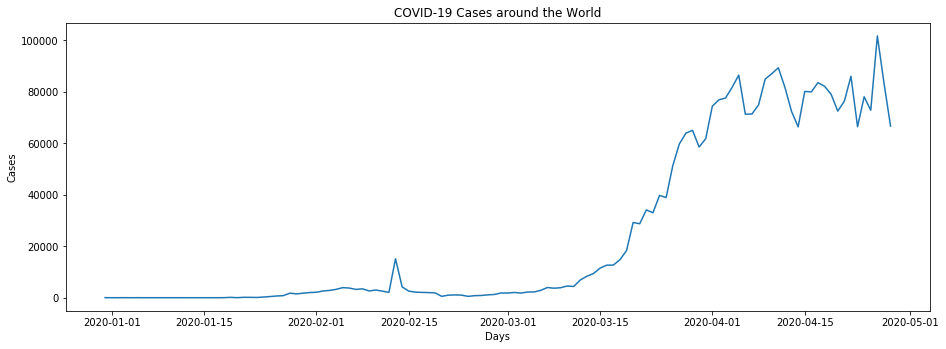

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_title("COVID-19 Cases around the World")
ax.set_xlabel('Days')
ax.set_ylabel('Cases')
ax.plot(daily.cases)
plt.show()

## 10 countries have the highest number of cases and death

In [12]:
countryb=cov[['CountryName','cases','deaths']]
cb=countryb.groupby(['CountryName']).sum()
cb = cb.sort_values(by=['cases','deaths'],ascending=False).head(10)
print(cb)


                           cases  deaths
CountryName                             
United_States_of_America  988451   56245
Spain                     209465   23190
Italy                     199414   26977
United_Kingdom            157149   21092
Germany                   156337    5913
France                    128339   23293
Turkey                    112261    2900
Iran                       91472    5806
Russia                     87147     795
China                      83938    4637


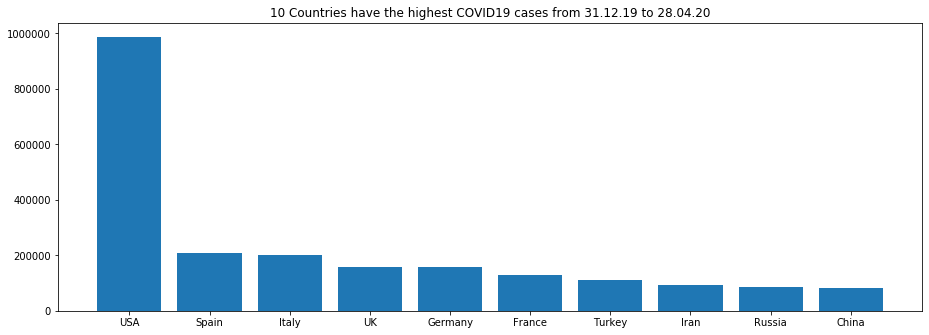

In [13]:
cb.rename(index={'United_States_of_America':'USA','United_Kingdom':'UK'},inplace=True)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_title("10 Countries have the highest COVID19 cases from 31.12.19 to 28.04.20")
# ax.set_xticks()
ax.bar(cb.index,cb.cases)
plt.show()


#    

The country classification data by The World Bank is used to label countries. (based on Gross domestic product (GDP))  
__Data Source:__ [World Bank national accounts data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?most_recent_value_desc=true)

In [17]:
gdp = pd.read_csv('gdp.csv')
gdp.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


---

## Social impacts of the COVID-19 epidemic

* _choose an outcome such as one of those above (or something entirely different than those),_ 
* _find the appropriate data to explore the effect of the COVID-19 pandemic on this issue, and_
* _present your findings (along with the dataset you used)._


Travel impact of the COVID-19 epidemic is chosen to analyze.  
__Data Source:__ [Google COVID-19 Community Mobility Reports](https://www.google.com/covid19/mobility/index.html?hl=en) 

In [19]:
mob = pd.read_csv('mob.csv')
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230828 entries, 0 to 230827
Data columns (total 12 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Unnamed: 0                                          230828 non-null  int64  
 1   CountryCode                                         230765 non-null  object 
 2   CountryName                                         230828 non-null  object 
 3   sub_region_1                                        222611 non-null  object 
 4   sub_region_2                                        152096 non-null  object 
 5   Date                                                230828 non-null  object 
 6   retail_and_recreation_percent_change_from_baseline  205491 non-null  float64
 7   grocery_and_pharmacy_percent_change_from_baseline   199694 non-null  float64
 8   parks_percent_change_from_baseline                  100798 non-n

In [16]:
mob.head()

,Unnamed: 0,CountryCode,CountryName,sub_region_1,sub_region_2,Date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


The mobility data includes 11 columns.  
CountryName and Date Columns are used to merge covid-19 and mobility datasets. 
There are 6 indicators; percent mobility changes of  _**(1) retail and recreation, (2) grocery and pharmacy, (3) parks, (4) transit stations, (5) workplaces, (6) residential**_ 

These datasets show how visits and length of stay at different places change compared to a baseline.  
They calculated these changes using the same kind of aggregated and anonymized data used to show popular times for places in Google Maps.

Changes for each day are compared to a baseline value for that day of the week:  
1 - The baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020.  
2 - The datasets show trends over several months with the most recent data representing approximately 2-3 days ago—this is how long it takes to produce the datasets.
